### Classification Models

Machine Learning에서 주된 주제는 분류 모형이다. Logit, Probit 모형에 머물던 분류 모형은 Machine Learning 알고리즘 등장으로 비약한 발전을 이뤘다. Regression Model과 마찬가지로 Classification Model 또한 크게 SVM, Tree Algorithm으로 나뉜다. 여기에 Naive Bayes 계열 모형이 추가되어 총 3개로 나뉜다고 보면 된다

#### 1. Logit / Probit

**1.1 Logit Model**

1958년 영국의 통계학자 Cox가 제안한 확률 모형으로써, 독립변수의 선형 결합을 이용하여 사건의 **발생 가능성**을 예측하는 데 사용되는 통계 기법이다. 독립 변수의 선형 결합으로 종속변수를 설명하는 관점에서는 선형 회귀 분석과 유사하지만, 종속변수가 범주형 데이터를 대상으로 한다는 점에서 분류 모형이라고 할 수 있다

Logit Model은 종속변수 $Y_i$가 1의 값을 갖는 확률 $p_i$를 아래와 같이 가정한다

$$p_i = E(Y_i) = \frac{1}{1+e^{-\mathbf{\beta X_i}}}$$

이진 분류 모형의 경우 아래와 같이 분류를 생각해볼 수 있다

$$p(Y_i = 1) = p_i = \frac{1}{1+e^{-\mathbf{\beta X_i}}} = \frac{e^{\mathbf{\beta X_i}}}{1+e^{\mathbf{\beta X_i}}$$
$$p(Y_i = 0) = 1 - p_i = \frac{1e^{-\mathbf{\beta X_i}}}{1+e^{-\mathbf{\beta X_i}}} = \frac{1}{1+e^{\mathbf{\beta X_i}}$$

추정된 $\hat{p_i}$는 각각 1인 확률과 0인 확률을 추정한다. 여기서 추정된 확률이 0.5보다 크면 1을, 0.5보다 작으면 0으로 처리하는 분류 모형을 고려할 수 있다

odds ratio는 어떤 사건이 일어날 확률을 사건이 일어나지 않을 확률로 나눈 것으로, 아래와 같이 나타낼 수 있다

$$\mathrm{odds} = \frac{p_i}{1-p_i} = e^{\mathbf{\beta X_i}}$$

odds ratio는 상대위험도의 척도로써 다양한 곳에서 사용되지 알아두면 좋다


**1.2 Probit Model**

Probit Model은 종속변수 $Y_i$기 1의 값을 갖는 확률이 다음과 같이 계산되는 모형이다

$$p_i = \int_{- \infty}^{\mathbf{\beta X_i}} \frac{1}{\sqrt{2\pi}} e^{-0.5\epsilon^2} d \epsilon \equiv \Phi (\mathbf{\beta X_i})$$

여기서 $\Phi (\mathbf{\beta X_i})$는 표준정규분포의 누정분포함수를 나타내며, Logit Model과 같이 0과 1 사이의 값을 가지는 확률을 추정한다

한편, 모형의 parameter는 일반적인 선형모델처럼 바로 구할 수는 없으며, Maximum Likelihood Extimation을 사용하여 구할 수 있다. 

Logit Model과 Probit Model 모두 고전적인 통계 모형에서 분류 모형에 해당하는 것으로, sklearn에서는 `Logistic Regression`이 같은 역할을 한다

In [1]:
import numpy as np
import pandas as pd

In [2]:
gdp = pd.read_csv('GDP.csv', index_col = 0)
gdp

,agricultural rate,armed forces size,birth rate,CO2 emissions,CPI,Fertility rate,forested area,gasoline price,gross primary education,gross tertiary deucation,...,minimum wage,health expenditure,physician ratio,labor force participation,tax revenue,total tax rate,unemployment rate,GDP per Capita,urban population rate,label
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.581,323000.0,0.3249,8672.0,149.900000,0.0447,0.021,0.70,1.040,0.097,...,0.43,0.784,0.28,0.489000,0.09300,0.714000,0.111200,502.115487,0.257540,0
Albania,0.431,9000.0,0.1178,4536.0,119.050000,0.0162,0.281,1.36,1.070,0.550,...,1.12,0.569,1.20,0.557000,0.18600,0.366000,0.123300,5352.857411,0.612290,0
Algeria,0.174,317000.0,0.2428,150006.0,151.360000,0.0302,0.008,0.28,1.099,0.514,...,0.95,0.281,1.72,0.412000,0.37200,0.661000,0.117000,3948.343279,0.731890,0
Andorra,0.400,0.0,0.0720,469.0,190.460955,0.0127,0.340,1.51,1.064,0.000,...,6.63,0.364,3.33,0.627381,0.16574,0.408224,0.068864,40886.391162,0.879845,1
Angola,0.475,117000.0,0.4073,34693.0,261.730000,0.0552,0.463,0.97,1.135,0.093,...,0.71,0.334,0.21,0.775000,0.09200,0.491000,0.068900,2973.591160,0.661770,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.245,343000.0,0.1788,164175.0,2740.270000,0.0227,0.527,0.00,0.972,0.793,...,0.01,0.458,1.92,0.597000,0.16574,0.733000,0.088000,16915.493453,0.882400,1
Vietnam,0.393,522000.0,0.1675,192668.0,163.520000,0.0205,0.481,0.80,1.106,0.285,...,0.73,0.435,0.82,0.774000,0.19100,0.376000,0.020100,2715.276036,0.366280,0
Yemen,0.446,40000.0,0.3045,10609.0,157.580000,0.0379,0.010,0.92,0.936,0.102,...,0.01,0.810,0.31,0.380000,0.16574,0.266000,0.129100,922.929642,0.372730,0


In [3]:
gdp.drop('GDP per Capita', axis = 1, inplace = True)

In [22]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = gdp.drop(['label','armed forces size','infant mortality','maternal mortality ratio','tax revenue','total tax rate','forested area','gasoline price','physician ratio','Fertility rate','gross primary education'], axis = 1)
X = sm.add_constant(X)
y = gdp['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
logit_model = sm.Logit(y_train, X_train)

result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.101234
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                  117
Model:                          Logit   Df Residuals:                      105
Method:                           MLE   Df Model:                           11
Date:                Sat, 11 Nov 2023   Pseudo R-squ.:                  0.8497
Time:                        02:46:26   Log-Likelihood:                -11.844
converged:                       True   LL-Null:                       -78.823
Covariance Type:            nonrobust   LLR p-value:                 2.749e-23
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -10.9502     22.020     -0.497      0.619     -54

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred_prob = result.predict(X_test)
y_pred = (result.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87        34
           1       0.70      0.94      0.80        17

    accuracy                           0.84        51
   macro avg       0.83      0.87      0.84        51
weighted avg       0.87      0.84      0.85        51


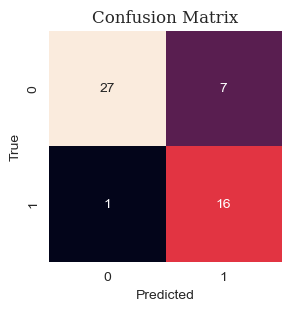

In [32]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize = 12, fontfamily = 'Serif')
plt.show()

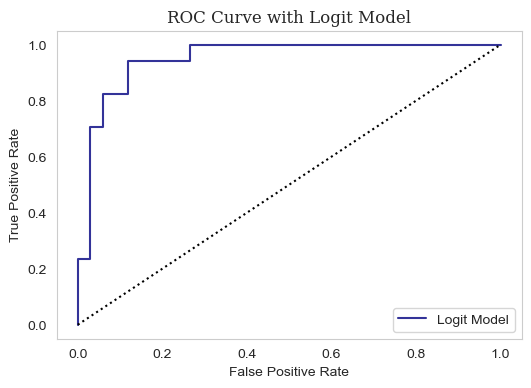

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, classification_report, roc_curve

y_pred_prob = result.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Logit Model', color = 'navy', alpha = 0.8)
plt.plot([0, 1], [0, 1], 'k:')
plt.grid(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Logit Model', fontsize = 12, fontfamily = 'Serif')
plt.legend()
plt.show()

probit model의 경우를 살펴보자

In [33]:
probit_model = sm.Probit(y_train, X_train)

result = probit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.100664
         Iterations 12
                          Probit Regression Results                           
Dep. Variable:                  label   No. Observations:                  117
Model:                         Probit   Df Residuals:                      105
Method:                           MLE   Df Model:                           11
Date:                Sat, 11 Nov 2023   Pseudo R-squ.:                  0.8506
Time:                        02:50:01   Log-Likelihood:                -11.778
converged:                       True   LL-Null:                       -78.823
Covariance Type:            nonrobust   LLR p-value:                 2.583e-23
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -5.2951     11.552     -0.458      0.647     -27

In [34]:
y_pred_prob = result.predict(X_test)
y_pred = (result.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87        34
           1       0.70      0.94      0.80        17

    accuracy                           0.84        51
   macro avg       0.83      0.87      0.84        51
weighted avg       0.87      0.84      0.85        51


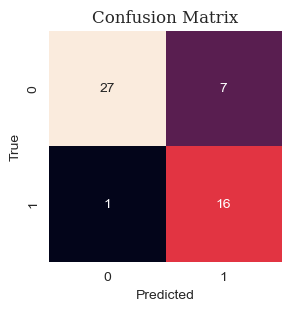

In [35]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize = 12, fontfamily = 'Serif')
plt.show()

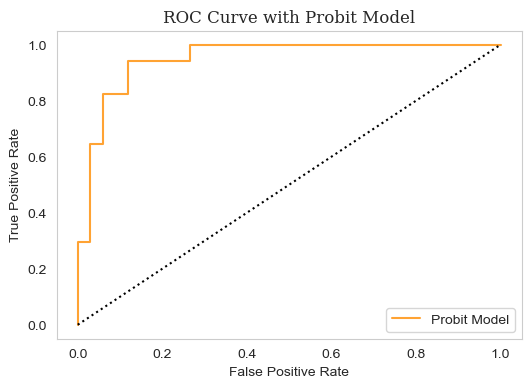

In [36]:
y_pred_prob = result.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Probit Model', color = 'darkorange', alpha = 0.8)
plt.plot([0, 1], [0, 1], 'k:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Probit Model', fontsize = 12, fontfamily = 'Serif')
plt.grid(False)
plt.legend()
plt.show()

#### 2. Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [38]:
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6470588235294118


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.78        34
           1       0.40      0.12      0.18        17

    accuracy                           0.65        51
   macro avg       0.54      0.51      0.48        51
weighted avg       0.58      0.65      0.58        51


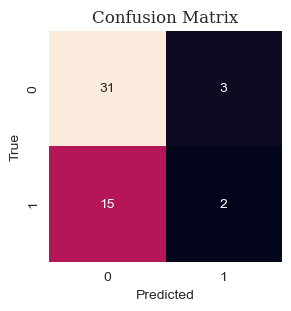

In [40]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize = 12, fontfamily = 'Serif')
plt.show()

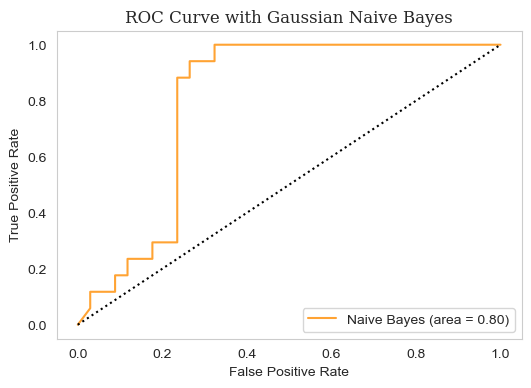

In [44]:
from sklearn.metrics import auc
y_prob = nb_model.fit(X_train, y_train).predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Naive Bayes (area = {:.2f})'.format(roc_auc), color = 'darkorange', alpha = 0.8)
plt.plot([0, 1], [0, 1], 'k:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Gaussian Naive Bayes', fontsize = 12, fontfamily = 'Serif')
plt.grid(False)
plt.legend()
plt.show()

#### 3. Support Vector Machine

#### 4. Decision Tree